In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
src_dir=r'/content/drive/MyDrive/6th_sem_Minor_Project/MinorProject/Datasets/TreadmillDataset/train/'

In [ ]:
train_imgs = []
train_labels = []
test_imgs = []
test_labels = []
classes = []
num_classes=10
n_pics=240

for i in range(1, num_classes+1):
  if (i < 10):
    stri = "0000" + str(i)+"/"
  else:
    stri = "000"+str(i)+"/"
  classes.append(str(i))
  for j in range(2,11):
    strj="gallery_"+str(j)+"km/"
    strj2="probe_"+str(j)+"km/"
    for k in range(1,n_pics+1):
      if (k < 10):
        strk = "0000000" + str(k)
      elif (k < 100):
        strk = "000000" + str(k)
      else:
        strk = "00000" + str(k)
      path = src_dir + stri + strj + strk + '.png'
      img = load_img(path, target_size=(64, 64))
      x3d = img_to_array(img)
      x = np.expand_dims(x3d[:,:,0], axis=2)
      train_imgs.append(x)
      label = [0] * num_classes
      label[i - 1] = 1
      train_labels.append(label)

      test_path = src_dir + stri + strj2 + strk + '.png'
      img = load_img(test_path, target_size=(64, 64))
      x3d = img_to_array(img)
      x = np.expand_dims(x3d[:, :, 0], axis=2)
      test_imgs.append(x)
      label = [0] * num_classes
      label[i - 1] = 1
      test_labels.append(label)





In [ ]:
x_train, y_train,x_test,y_test=np.array(train_imgs), np.array(train_labels),np.array(test_imgs), np.array(test_labels)

In [ ]:
 x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf

In [ ]:
 model = Sequential()
model.add(Conv2D(8, (5, 5), padding='valid',
                 input_shape=(64, 64, 1)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(8, (5, 5), padding='valid'))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(8, (5, 5), padding='valid'))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(8, (5, 5), padding='same'))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(num_classes, input_shape=(200,)))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 8)         208       
_________________________________________________________________
activation (Activation)      (None, 60, 60, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 8)         1608      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 8)           1

In [ ]:
history=model.fit(x_train, y_train,batch_size=16,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
844/844 [==============================] - 38s 45ms/step - loss: 1.9687 - accuracy: 0.3148 - val_loss: 0.9990 - val_accuracy: 0.6986
Epoch 2/50
844/844 [==============================] - 37s 44ms/step - loss: 0.7895 - accuracy: 0.7659 - val_loss: 0.6319 - val_accuracy: 0.7964
Epoch 3/50
844/844 [==============================] - 37s 44ms/step - loss: 0.4142 - accuracy: 0.8783 - val_loss: 0.4881 - val_accuracy: 0.8400
Epoch 4/50
844/844 [==============================] - 38s 44ms/step - loss: 0.2636 - accuracy: 0.9247 - val_loss: 0.3971 - val_accuracy: 0.8667
Epoch 5/50
844/844 [==============================] - 37s 44ms/step - loss: 0.1862 - accuracy: 0.9473 - val_loss: 0.4215 - val_accuracy: 0.8569
Epoch 6/50
844/844 [==============================] - 37s 44ms/step - loss: 0.1456 - accuracy: 0.9577 - val_loss: 0.3530 - val_accuracy: 0.8759
Epoch 7/50
844/844 [==============================] - 37s 44ms/step - loss: 0.1119 - accuracy: 0.9677 - val_loss: 0.3736 - val_accuracy:

In [ ]:
history.history

{'accuracy': [0.4784444570541382,
  0.7989629507064819,
  0.8899258971214294,
  0.9296296238899231,
  0.9474814534187317,
  0.9590370655059814,
  0.9668889045715332,
  0.9746666550636292,
  0.9790370464324951,
  0.9807407259941101,
  0.9832592606544495,
  0.9862222075462341,
  0.9875555634498596,
  0.9888888597488403,
  0.9905925989151001,
  0.9919259548187256,
  0.9921481609344482,
  0.9933333396911621,
  0.9932592511177063,
  0.9934074282646179,
  0.9936296343803406,
  0.9942222237586975,
  0.9937777519226074,
  0.9965184926986694,
  0.995555579662323,
  0.9944444298744202,
  0.9946666955947876,
  0.9961481690406799,
  0.9949629902839661,
  0.9971110820770264,
  0.9961481690406799,
  0.9954074025154114,
  0.9967407584190369,
  0.9963703751564026,
  0.996222198009491,
  0.9977037310600281,
  0.996222198009491,
  0.9959999918937683,
  0.9977777600288391,
  0.9970370531082153,
  0.9965184926986694,
  0.9968888759613037,
  0.9969629645347595,
  0.9974074363708496,
  0.9973333477973938,
 

In [ ]:
score=model.evaluate(x_test,y_test)

422/422 [==============================] - 8s 20ms/step - loss: 0.5444 - accuracy: 0.8895


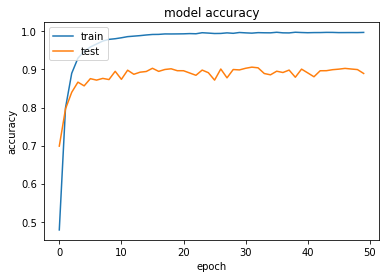

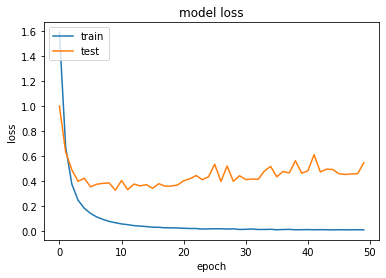

In [ ]:
#importing library for plotting graph
import matplotlib.pyplot as plt

#Plotting Model accuracy on training and testing dataset with epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Plotting Model Loss on training and testing dataset with epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
predicted=y_pred.argmax(axis=1)+1
predicted

array([ 1,  1,  1, ..., 10, 10, 10])

In [ ]:
real=y_test.argmax(axis=1)+1

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(real,predicted,target_names=classes))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98      1350
           2       0.77      0.94      0.84      1350
           3       0.77      0.95      0.85      1350
           4       0.88      0.86      0.87      1350
           5       0.98      0.81      0.88      1350
           6       0.96      0.95      0.96      1350
           7       0.85      0.79      0.82      1350
           8       0.95      0.91      0.93      1350
           9       0.86      0.90      0.88      1350
          10       0.96      0.80      0.88      1350

    accuracy                           0.89     13500
   macro avg       0.90      0.89      0.89     13500
weighted avg       0.90      0.89      0.89     13500



In [ ]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 28.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


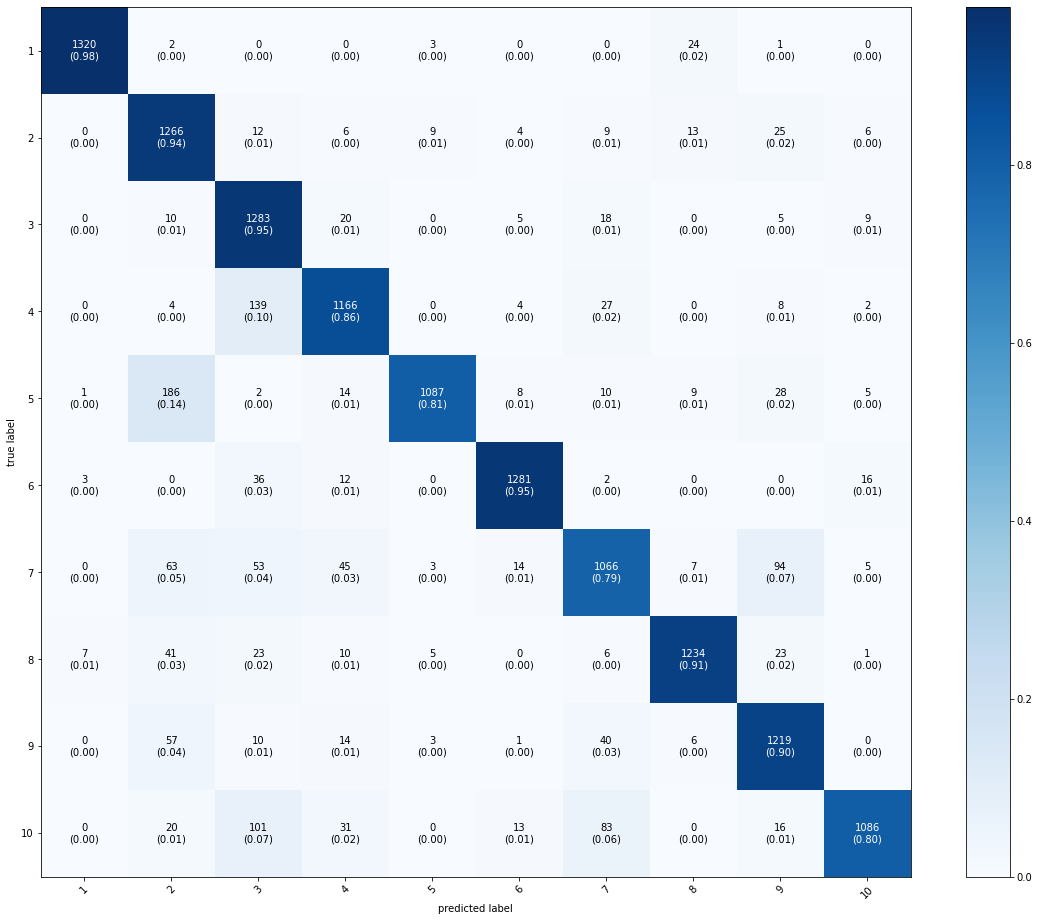

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mat=confusion_matrix(real, predicted)
fig, ax = plot_confusion_matrix(conf_mat=mat,figsize=(20,16),colorbar=True,show_normed=True,class_names=classes)
plt.show()